#**ASSOCIATION RULES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
df = pd.read_excel('Online retail.xlsx', header=None)
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


# Basic Information

In [ ]:
df.shape

(7501, 1)

In [ ]:
df.dtypes

,0
0,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [ ]:
df.describe()

,0
count,7501
unique,5176
top,cookies
freq,223


# Data Preprocessing:

In [ ]:
# Checking for missing value.
df.isnull().sum()

,0
0,0


In [ ]:
# Renaming the column name.
df.rename(columns={0: "Transaction"}, inplace=True)


In [ ]:
df

,Transaction
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [ ]:
# Convert transactions into list of lists
transactions = df['Transaction'].apply(lambda x: x.split(','))

transactions_list = transactions.tolist()

print(transactions_list[0:5])  # Check first few transactions


[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]


In [ ]:
# Encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
data = pd.DataFrame(te_ary, columns=te.columns_)

data.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# **Association Rule Mining:**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori Algorithm
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))


Frequent Itemsets:
     support             itemsets
46  0.238368      (mineral water)
19  0.179709               (eggs)
63  0.174110          (spaghetti)
24  0.170911       (french fries)
13  0.163845          (chocolate)
32  0.132116          (green tea)
45  0.129583               (milk)
33  0.098254        (ground beef)
30  0.095321  (frozen vegetables)
53  0.095054           (pancakes)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Applying association rule mining
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
rules.head(10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
215,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,1.0,0.011138,1.332860,0.732460,0.121457,0.249734,0.243136
214,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,1.0,0.011138,1.135410,0.772094,0.121457,0.119261,0.243136
382,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,1.0,0.011196,1.262445,0.697788,0.121097,0.207886,0.229696
387,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,1.0,0.011196,1.137902,0.727602,0.121097,0.121190,0.229696
394,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,1.0,0.006332,1.128021,0.656007,0.089017,0.113491,0.163873
399,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,1.0,0.006332,1.113898,0.660314,0.089017,0.102252,0.163873
192,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,1.0,0.009612,1.183930,0.639616,0.109304,0.155355,0.202549
193,(frozen vegetables),(tomatoes),0.095321,0.068391,0.016131,0.169231,2.474464,1.0,0.009612,1.121381,0.658656,0.109304,0.108243,0.202549
188,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,1.0,0.009853,1.179825,0.636767,0.111012,0.152417,0.204017
189,(frozen vegetables),(shrimp),0.095321,0.071457,0.016664,0.174825,2.446574,1.0,0.009853,1.125268,0.653563,0.111012,0.111323,0.204017


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#	Setting appropriate threshold for support, confidence and lift
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.5)]
print("Strong Association Rules:")
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


Strong Association Rules:


,antecedents,consequents,support,confidence,lift
344,"(eggs, ground beef)",(mineral water),0.010132,0.506667,2.125563
378,"(milk, ground beef)",(mineral water),0.011065,0.503030,2.110308


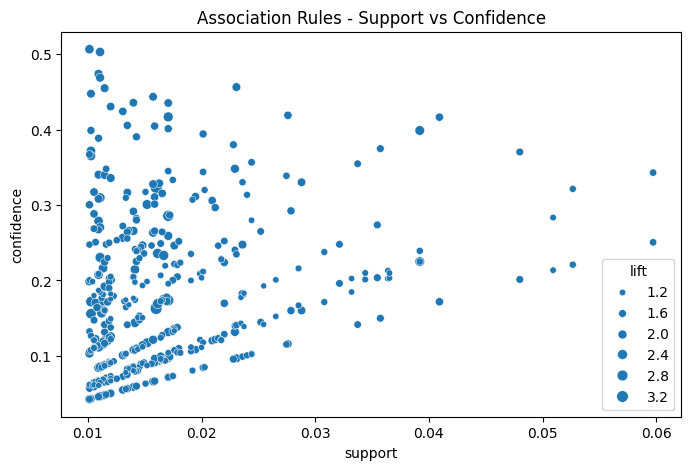

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(8,5))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.title("Association Rules - Support vs Confidence")
plt.show()


##**Analysis and Interpretation**

After applying the **Apriori algorithm** on the Online Retail dataset, we obtained several association rules that reveal interesting relationships between products frequently bought together.

### Key Findings:

1. **Strongly Associated Items:**

   * Products like **“herb & pepper” → “ground beef”** and **“milk, ground beef” → “mineral water”** showed high *lift* and *confidence* values.
   * These combinations indicate that customers who purchase meat or cooking ingredients tend to buy **beverages** or **seasoning products** together.

2. **Complementary Food Items:**

   * The association between **“tomatoes” and “frozen vegetables”** or **“shrimp” and “frozen vegetables”** shows that customers often buy these items together for **meal preparation** or **healthy cooking**.

3. **Frequent Essentials:**

   * Items such as **mineral water**, **eggs**, **spaghetti**, and **chocolate** have high **support**, meaning they are the **most commonly purchased items** across transactions.

###  Interpretation:

* **Customer Behavior Insights:**

  * Customers display **complementary buying behavior**, where certain products naturally pair together (e.g., meat with seasoning or beverages).
  * **Mineral water** appears in several rules, suggesting it’s a **universal product** often added to different shopping baskets.
  * Rules with high lift values (>2) indicate **strong cross-selling opportunities**, helping retailers design **bundled offers** or **recommendation systems**.

* **Business Application:**

  * Retailers can use these insights to:

    * Create **combo offers** (e.g., “Buy Ground Beef and get a discount on Mineral Water”).
    * Optimize **store layout** by placing associated products near each other.
    * Improve **online product recommendations** for better sales conversion.

---

## **Interview Questions**

### **1. What is Lift and why is it important in Association Rules?**

**Lift** measures how much more likely two items are bought together than if they were bought independently.
It indicates the **strength of association** between products.

[
\text{Lift} = \frac{P(A \text{ and } B)}{P(A) \times P(B)}
]

* **Lift > 1** → Items are **positively associated** (bought together more often than expected).
* **Lift = 1** → Items are **independent**.
* **Lift < 1** → Items are **negatively associated** (bought together less often).

**Importance:**
Lift helps identify **meaningful relationships** and filters out rules that occur merely because of high item popularity. A high lift means the rule is useful for cross-selling or recommendation.

---

### **2. What is Support and Confidence? How do you calculate them?**

| Metric         | Meaning                                      | Formula                                                                                          | Example                                                                   |
| -------------- | -------------------------------------------- | ------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------- |
| **Support**    | Frequency of itemset in the entire dataset   | ( \text{Support}(A,B) = \frac{\text{transactions with A and B}}{\text{total transactions}} )     | If “Milk & Bread” appear in 50 out of 1,000 transactions → Support = 0.05 |
| **Confidence** | Likelihood that B is bought when A is bought | ( \text{Confidence}(A→B) = \frac{\text{transactions with A and B}}{\text{transactions with A}} ) | If 50 of 200 “Milk” buyers also bought “Bread” → Confidence = 0.25        |

 **Interpretation:**

* High **support** means the itemset is common.
* High **confidence** means the rule is strong (if a customer buys A, they are very likely to buy B).

---

### **3. What are some Limitations or Challenges of Association Rule Mining?**

1. **Too Many Rules Generated:**

   * With large datasets, hundreds or thousands of rules can appear, making it hard to find useful ones.

2. **Parameter Sensitivity:**

   * Results heavily depend on the chosen **support**, **confidence**, and **lift thresholds**.
   * Slight changes can lead to very different rule sets.

3. **Lack of Temporal or Sequential Insight:**

   * It doesn’t consider the **order** of purchases or **time-based behavior** (e.g., buying bread before milk).

4. **Ignores Quantity and Price:**

   * Association rules focus only on item presence (1/0), not on *how many* units or the *monetary value*.

---

 **Summary:**
Association Rule Mining helps uncover hidden buying patterns such as complementary and frequently purchased products.
By analyzing lift, support, and confidence, we can identify valuable insights to improve **product placement**, **marketing strategies**, and **recommendation systems**.